# Assignment 3 - Building a Custom Visualization

---

In this assignment you must choose one of the options presented below and submit a visual as well as your source code for peer grading. The details of how you solve the assignment are up to you, although your assignment must use matplotlib so that your peers can evaluate your work. The options differ in challenge level, but there are no grades associated with the challenge level you chose. However, your peers will be asked to ensure you at least met a minimum quality for a given technique in order to pass. Implement the technique fully (or exceed it!) and you should be able to earn full grades for the assignment.


&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Ferreira, N., Fisher, D., & Konig, A. C. (2014, April). [Sample-oriented task-driven visualizations: allowing users to make better, more confident decisions.](https://www.microsoft.com/en-us/research/wp-content/uploads/2016/02/Ferreira_Fisher_Sample_Oriented_Tasks.pdf) 
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;In Proceedings of the SIGCHI Conference on Human Factors in Computing Systems (pp. 571-580). ACM. ([video](https://www.youtube.com/watch?v=BI7GAs-va-Q))


In this [paper](https://www.microsoft.com/en-us/research/wp-content/uploads/2016/02/Ferreira_Fisher_Sample_Oriented_Tasks.pdf) the authors describe the challenges users face when trying to make judgements about probabilistic data generated through samples. As an example, they look at a bar chart of four years of data (replicated below in Figure 1). Each year has a y-axis value, which is derived from a sample of a larger dataset. For instance, the first value might be the number votes in a given district or riding for 1992, with the average being around 33,000. On top of this is plotted the 95% confidence interval for the mean (see the boxplot lectures for more information, and the yerr parameter of barcharts).

<br>
<img src="readonly/Assignment3Fig1.png" alt="Figure 1" style="width: 400px;"/>
<h4 style="text-align: center;" markdown="1">  &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Figure 1 from (Ferreira et al, 2014).</h4>

<br>

A challenge that users face is that, for a given y-axis value (e.g. 42,000), it is difficult to know which x-axis values are most likely to be representative, because the confidence levels overlap and their distributions are different (the lengths of the confidence interval bars are unequal). One of the solutions the authors propose for this problem (Figure 2c) is to allow users to indicate the y-axis value of interest (e.g. 42,000) and then draw a horizontal line and color bars based on this value. So bars might be colored red if they are definitely above this value (given the confidence interval), blue if they are definitely below this value, or white if they contain this value.


<br>
<img src="readonly/Assignment3Fig2c.png" alt="Figure 1" style="width: 400px;"/>
<h4 style="text-align: center;" markdown="1">  Figure 2c from (Ferreira et al. 2014). Note that the colorbar legend at the bottom as well as the arrows are not required in the assignment descriptions below.</h4>

<br>
<br>

**Easiest option:** Implement the bar coloring as described above - a color scale with only three colors, (e.g. blue, white, and red). Assume the user provides the y axis value of interest as a parameter or variable.


**Harder option:** Implement the bar coloring as described in the paper, where the color of the bar is actually based on the amount of data covered (e.g. a gradient ranging from dark blue for the distribution being certainly below this y-axis, to white if the value is certainly contained, to dark red if the value is certainly not contained as the distribution is above the axis).

**Even Harder option:** Add interactivity to the above, which allows the user to click on the y axis to set the value of interest. The bar colors should change with respect to what value the user has selected.

**Hardest option:** Allow the user to interactively set a range of y values they are interested in, and recolor based on this (e.g. a y-axis band, see the paper for more details).

---

*Note: The data given for this assignment is not the same as the data used in the article and as a result the visualizations may look a little different.*

In [79]:
# Use the following data for this assignment:

import pandas as pd
import numpy as np

np.random.seed(12345)

df = pd.DataFrame(data={
                    '1992': np.random.normal(32000,200000,3650), 
                   '1993': np.random.normal(43000,100000,3650), 
                   '1994': np.random.normal(43500,140000,3650), 
                   '1995': np.random.normal(48000,70000,3650)} 
)
df



,1992,1993,1994,1995
0,-8941.531897,-51896.094813,152336.932066,-69708.439062
1,127788.667612,198350.518755,192947.128056,-13289.977022
2,-71887.743011,-123518.252821,389950.263156,-30178.390991
3,-79146.060869,-129916.759685,-93006.152024,55052.181256
4,425156.114501,216119.147314,100818.575896,152883.621657
...,...,...,...,...
3645,24185.008589,-37333.493572,-71861.846997,39937.199964
3646,-56826.729535,103019.841174,26375.113219,139472.114293
3647,-67319.766489,179746.127403,-29328.078384,59386.186379
3648,113377.299342,13455.493990,65858.761714,73362.229590


In [80]:
df_means = pd.DataFrame(
    { 
        'means_92':[np.random.normal(32000,200000,3650).mean() for i in range(1000)],
        'means_93':[np.random.normal(43000,100000,3650).mean() for i in range(1000)],
        'means_94':[np.random.normal(43500,140000,3650).mean() for i in range(1000)],
        'means_95':[np.random.normal(48000,70000,3650).mean() for i in range(1000)]
        
    }
)
df_means.head()

,means_92,means_93,means_94,means_95
0,31121.673831,44724.675059,43648.453247,49582.103429
1,35724.911153,42434.877465,43656.272915,46953.397669
2,30973.981448,43750.476097,42254.569072,49341.116138
3,32662.106688,42103.084227,41408.422568,48191.707850
4,27567.698938,46817.615073,42074.872340,46079.454089


In [73]:
df_means_err = df_means.std()
print(df_means_err)

means_92    3409.888620
means_93    1657.176401
means_94    2332.747790
means_95    1147.985748
dtype: float64


In [81]:
df_lower_err = df_means - 1.96 * df_means_err/math.sqrt(3650)
df_upper_err = df_means + 1.96 * df_means_err/math.sqrt(3650)

print(df_lower_err.head())

print(df_upper_err.head())


       means_92      means_93      means_94      means_95
0  31011.049710  44670.912693  43572.773891  49544.860302
1  35614.287032  42381.115098  43580.593560  46916.154542
2  30863.357327  43696.713730  42178.889716  49303.873011
3  32551.482568  42049.321860  41332.743213  48154.464724
4  27457.074817  46763.852707  41999.192985  46042.210962
       means_92      means_93      means_94      means_95
0  31232.297952  44778.437426  43724.132603  49619.346555
1  35835.535274  42488.639831  43731.952271  46990.640796
2  31084.605568  43804.238464  42330.248427  49378.359265
3  32772.730809  42156.846593  41484.101924  48228.950977
4  27678.323059  46871.377440  42150.551696  46116.697216


# Algorithm for the solution
Solving for the easist problem:
    
Steps:
1. Generate the data
1. Generate the confidence levels for the range of data
1. Draw a bar chart of the original data which represents a sample
1. Overlay the box-whisker blot on top of the original data box chart
1. Read a user provided input: 
    1. Get the probability for each column (blue if column is def below the range, white if its contained or red if its def above)
    1. Redraw the bars based on the color scheme

In [82]:
import scipy.stats as st
data_length, _ = df.shape
mean = df['1992'].mean()
confint_92 = st.t.interval(alpha=0.95,df=data_length, loc=mean,scale=st.sem(df['1992']))
print(mean)
print(confint_92)

33312.10747554433
(26801.170049408298, 39823.04490168037)


In [83]:
df.columns

Index(['1992', '1993', '1994', '1995'], dtype='object')

,means
0,31121.673831
1,35724.911153
2,30973.981448
3,32662.106688
4,27567.698938


In [90]:
df_means.shape

(1000, 4)

<IPython.core.display.Javascript object>


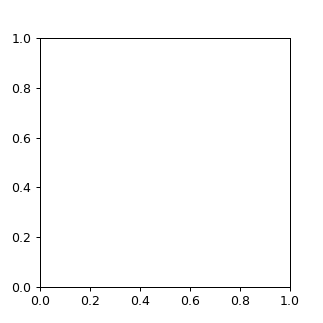

TypeError: only size-1 arrays can be converted to Python scalars

In [89]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib notebook
color =['red', 'orange', 'blue','gray']
plt.figure(figsize=(4, 4))
x_pos = np.arange(len(df.columns))

axs = plt.bar(x_pos, df_means, 
              color=color,
              alpha=0.7, 
              align='center');
#plt.xticks(y_pos, df.columns);




In [77]:
import pandas as pd
import numpy as np
np.random.seed(12345)

df = pd.DataFrame([np.random.normal(32000,200000,3650), 
                   np.random.normal(43000,100000,3650), 
                   np.random.normal(43500,140000,3650), 
                   np.random.normal(48000,70000,3650)], 
                  index=[1992,1993,1994,1995])
                  
# Let's do the random sampling 1000 times
df_means = pd.DataFrame({'means':[np.random.normal(32000,200000,3650).mean() for i in range(1000)]})
pritn(df_means.head())

print(df_means.std(axis=0))


#std output:
#means    3414.816232
#dtype: float64
    
    # data standard deviation: 200000
# sample size: 3650
import math
x = 200000 / math.sqrt(3650)
print(x)

#output:
#3310.4235544094718



NameError: name 'pritn' is not defined